In [4]:
# import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
from PIL import Image
import os
import math

In [5]:
interpreter = tf.lite.Interpreter(model_path = r'movenet.tflite')
interpreter.allocate_tensors()

Flipping Training Images

In [14]:
def flip_images(input_dir, output_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Loop through all the files in the input directory
    for filename in os.listdir(input_dir):
        # Construct the full file path
        img_path = os.path.join(input_dir, filename)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            # Open the image
            img = Image.open(img_path)
            
            # Flip the image horizontally
            flipped_img = img.transpose(Image.FLIP_LEFT_RIGHT)
            
            # Save the flipped image to the output directory
            if filename.lower().endswith('.png'):
                flipped_img.save(os.path.join(output_dir, filename+'_flipped.png'))
            if filename.lower().endswith ('.jpg'):
                flipped_img.save(os.path.join(output_dir, filename+'_flipped.jpg'))
            if filename.lower().endswith ('.jpeg'):
                flipped_img.save(os.path.join(output_dir, filename+'_flipped.jpeg'))
            print(f"Flipped and saved: {filename}")

# Example usage:
input_plank_correct = r'correct plank'
output_plank_correct = r'correct plank'

input_plank_incorrect = r'wrong plank'
output_plank_incorrect = r'wrong plank'

input_random = r'randoms'
output_random = r'randoms'

# flip_images(input_plank_correct, output_plank_correct)
flip_images(input_plank_incorrect, output_plank_incorrect)
# flip_images(input_random, output_random)

Flipped and saved: 537164385ee88eb85b38f2adc86f739a91419df2.png
Flipped and saved: bad-plank-1.jpg
Flipped and saved: b_dib_Metzl3Plank_170410.jpg
Flipped and saved: common-form-errors-plank-exercise-6.jpg
Flipped and saved: hq720.jpg
Flipped and saved: image_full.jpg
Flipped and saved: IMG-20210719-WA0015.jpg
Flipped and saved: plank-booty-boost.jpg
Flipped and saved: plank-incorrect-300x225.jpg
Flipped and saved: plank-wrong-2.jpg
Flipped and saved: Screenshot 2024-08-28 210243.png
Flipped and saved: Screenshot 2024-08-28 210743.png
Flipped and saved: Screenshot 2024-08-28 210820.png
Flipped and saved: Screenshot 2024-08-28 210855.png
Flipped and saved: Wrong-Plank-2.jpg


In [75]:
from PIL import Image
import os

Dataframe of landmarks of the training Images

In [6]:
def landmarks_from_correct_planks_images(input_dir,X,Y):
    for file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, file)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img = Image.open(img_path)
            img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
            input_image = tf.cast(img, dtype=tf.float32)

            # Setup input and output
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()

            #make predictions
            interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
            interpreter.invoke()
            keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
            landmarks = keypoints_with_scores

            X.append(landmarks)
            Y.append(0)
    return X,Y

def landmarks_from_incorrect_planks_images(input_dir,X,Y):
    for file in os.listdir(input_dir):
        print('hi')
        img_path = os.path.join(input_dir, file)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img = Image.open(img_path)
            img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
            input_image = tf.cast(img, dtype=tf.float32)

            # Setup input and output
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()

            print(file)

            #make predictions
            interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
            interpreter.invoke()
            keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
            landmarks = keypoints_with_scores

            X.append(landmarks)
            Y.append(1)
    return X,Y

def landmarks_from_random_images(input_dir,X,Y):
    for file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, file)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img = Image.open(img_path)
            img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
            input_image = tf.cast(img, dtype=tf.float32)

            # Setup input and output
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()

            print(file)

            #make predictions
            interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
            interpreter.invoke()
            keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
            landmarks = keypoints_with_scores

            X.append(landmarks)
            Y.append(2)
    return X,Y

In [20]:
X,Y = landmarks_from_correct_planks_images(r'correct plank',[],[])
X,Y = landmarks_from_incorrect_planks_images(r'wrong plank', X, Y)
X,Y = landmarks_from_random_images('randoms', X, Y)

hi
bad-plank-1.jpg
hi
bad-plank-1.jpg_flipped.jpg
hi
b_dib_Metzl3Plank_170410.jpg
hi
b_dib_Metzl3Plank_170410.jpg_flipped.jpg
hi
common-form-errors-plank-exercise-6.jpg
hi
common-form-errors-plank-exercise-6.jpg_flipped.jpg
hi
hq720.jpg
hi
hq720.jpg_flipped.jpg
hi
image_full.jpg
hi
image_full.jpg_flipped.jpg
hi
IMG-20210719-WA0015.jpg
hi
IMG-20210719-WA0015.jpg_flipped.jpg
hi
plank-booty-boost.jpg
hi
plank-booty-boost.jpg_flipped.jpg
hi
plank-incorrect-300x225.jpg
hi
plank-incorrect-300x225.jpg_flipped.jpg
hi
plank-wrong-2.jpg
hi
plank-wrong-2.jpg_flipped.jpg
hi
Screenshot 2024-08-28 210243.jpg
hi
Screenshot 2024-08-28 210243.png_flipped.jpg
hi
Screenshot 2024-08-28 210743.jpg
hi
Screenshot 2024-08-28 210743.png_flipped.jpg
hi
Screenshot 2024-08-28 210820.jpg
hi
Screenshot 2024-08-28 210820.png_flipped.jpg
hi
Screenshot 2024-08-28 210855.jpg
hi
Screenshot 2024-08-28 210855.png_flipped.jpg
hi
Wrong-Plank-2.jpg
hi
Wrong-Plank-2.jpg_flipped.jpg
hi
zzzz.jpg
hi
zzzz2.jpg
1080x648_heroFEATUR

In [21]:
X

[array([[[[0.45993716, 0.21759763, 0.6050981 ],
          [0.43508452, 0.21171205, 0.4385119 ],
          [0.43825838, 0.20819198, 0.41724914],
          [0.4134909 , 0.2438074 , 0.57315475],
          [0.41940743, 0.2305159 , 0.48205224],
          [0.44845474, 0.30716562, 0.6700543 ],
          [0.46799928, 0.29718024, 0.7241874 ],
          [0.57740635, 0.3165818 , 0.74511695],
          [0.57523555, 0.31727746, 0.5613043 ],
          [0.5645448 , 0.19594036, 0.5321057 ],
          [0.562109  , 0.19036005, 0.6432636 ],
          [0.47198737, 0.5348896 , 0.6221596 ],
          [0.48254773, 0.5331932 , 0.6964194 ],
          [0.51158315, 0.7315821 , 0.53598803],
          [0.5124332 , 0.72498274, 0.5810645 ],
          [0.51108557, 0.9302844 , 0.72161067],
          [0.5079765 , 0.91540694, 0.61170745]]]], dtype=float32),
 array([[[[0.4495735 , 0.7869474 , 0.53417337],
          [0.43122464, 0.793213  , 0.35309312],
          [0.42902   , 0.7826609 , 0.5352036 ],
          [0.42342472

In [22]:
Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [23]:

# Generate column names
columns = [f"{i}_x" for i in range(1, 18) if i in (1,6,7,8,9,10,11,12,13,14,15,16,17)] + [f"{i}_y" for i in range(1, 18) if i in (1,6,7,8,9,10,11,12,13,14,15,16,17)] + ['Y']

# Create an empty DataFrame with these columns
df = pd.DataFrame(columns=columns)

# Display the DataFrame to verify
print(df)

Empty DataFrame
Columns: [1_x, 6_x, 7_x, 8_x, 9_x, 10_x, 11_x, 12_x, 13_x, 14_x, 15_x, 16_x, 17_x, 1_y, 6_y, 7_y, 8_y, 9_y, 10_y, 11_y, 12_y, 13_y, 14_y, 15_y, 16_y, 17_y, Y]
Index: []

[0 rows x 27 columns]


In [24]:
df = pd.DataFrame(columns=columns)

y = 0
for entry in X:
    new_row = {col: None for col in columns}
    x = 0
    for x in range(1,18):
        if x in (1,6,7,8,9,10,11,12,13,14,15,16,17):
            xName = str(x) + '_x'
            yName = str(x) + '_y'
            new_row[xName] = entry[0][0][x-1][0]
            new_row[yName] = entry[0][0][x-1][1]
        x = x+1
    new_row['Y'] = Y[y]
    y = y+1
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

C:\Users\2001l\AppData\Local\Temp\ipykernel_31708\3437495365.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


In [25]:
df_landmarks = df

In [26]:
df_landmarks.to_csv('plank_landmarks.csv', index = False)

In [27]:
df_landmarks = pd.read_csv('plank_landmarks.csv')

In [28]:
df_relavant= pd.DataFrame(columns=['right_shoulder','left_shoulder','right_elbow','left_elbow','right_upper','left_upper','right_bottom','left_bottom','Y'])

In [29]:
df_landmarks.corr()

,1_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,...,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,Y
1_x,1.000000,0.947948,0.946175,0.904453,0.912754,0.789739,0.785437,-0.133030,-0.146727,-0.384928,...,0.167564,-0.093977,0.103651,-0.254542,0.299868,-0.149852,0.165022,-0.081037,0.091056,-0.704247
6_x,0.947948,1.000000,0.957320,0.953091,0.884917,0.864411,0.775500,0.101821,0.066842,-0.209851,...,0.092893,-0.135693,0.043457,-0.252924,0.221284,-0.108135,0.167126,-0.049811,0.109077,-0.677200
7_x,0.946175,0.957320,1.000000,0.875624,0.952591,0.775060,0.858502,0.090147,0.096601,-0.244798,...,0.197242,-0.031848,0.145091,-0.190581,0.275855,-0.145599,0.125429,-0.101896,0.059398,-0.677845
8_x,0.904453,0.953091,0.875624,1.000000,0.849166,0.930461,0.735334,0.015836,-0.042481,-0.157921,...,0.033189,-0.211255,-0.021585,-0.290845,0.201054,-0.080540,0.193630,-0.001987,0.141792,-0.715833
9_x,0.912754,0.884917,0.952591,0.849166,1.000000,0.743033,0.920962,-0.028876,-0.007641,-0.233956,...,0.279093,0.033034,0.223461,-0.208190,0.285520,-0.201125,0.077649,-0.154313,-0.003523,-0.723358
10_x,0.789739,0.864411,0.775060,0.930461,0.743033,1.000000,0.720906,0.098440,0.035319,-0.053819,...,0.011118,-0.156001,-0.025388,-0.236976,0.110906,-0.071821,0.120791,-0.010841,0.092587,-0.572922
11_x,0.785437,0.775500,0.858502,0.735334,0.920962,0.720906,1.000000,0.069701,0.098952,-0.123803,...,0.211389,0.031979,0.164630,-0.096663,0.237825,-0.115746,0.081152,-0.104506,0.014938,-0.566407
12_x,-0.133030,0.101821,0.090147,0.015836,-0.028876,0.098440,0.069701,1.000000,0.978670,0.532258,...,-0.134429,-0.000703,-0.082853,0.123256,-0.148714,0.100127,-0.030089,0.020716,0.021484,0.117019
13_x,-0.146727,0.066842,0.096601,-0.042481,-0.007641,0.035319,0.098952,0.978670,1.000000,0.486929,...,-0.039514,0.108369,0.021127,0.121314,-0.163173,0.027792,-0.110225,-0.060763,-0.059263,0.129620
14_x,-0.384928,-0.209851,-0.244798,-0.157921,-0.233956,-0.053819,-0.123803,0.532258,0.486929,1.000000,...,-0.148296,-0.051322,-0.141915,0.068305,-0.158766,0.051775,0.020840,0.043027,0.015790,0.284415


In [30]:
def calculate_angles(a, b, c):
    
    # Vectors from points
    vec_1 = [a[0] - b[0], a[1] - b[1]]
    vec_2 = [c[0] - b[0], c[1] - b[1]]
    
    # Dot product
    dot_product = vec_1[0] * vec_2[0] + vec_1[1] * vec_2[1]
    
    # Magnitudes of the vectors
    mag_1 = math.sqrt(vec_1[0]**2 + vec_1[1]**2)
    mag_2 = math.sqrt(vec_2[0]**2 + vec_2[1]**2)
    
    # Angle in radians
    angle_rad = math.acos(dot_product / (mag_1 * mag_2))
    
    # Convert to degrees
    angle_deg = math.degrees(angle_rad)
    
    return angle_deg

def calculate_dist(a,b):
    x_diff = a[0] - b[0]
    y_diff = a[1] - b[1]
    dist = math.sqrt(x_diff**2 + y_diff**2)
    return dist

In [62]:
def angle_dataframe(df):
    # df_angles= pd.DataFrame(columns=['right_knee','right_hip','right_shoulder','right_elbow','left_knee','left_hip','left_shoulder','left_elbow','nose_from_floor','Y'])
    df_angles = pd.DataFrame(columns=['knee','hip','shoulder','elbow','nose_from_floor','Y'])
    angles_list = []
    for index,row in df.iterrows():
        nose = [row['1_x'],row['1_y']]
        right_shoulder = [row['7_x'],row['7_y']]
        right_elbow = [row['9_x'],row['9_y']]
        right_wrist = [row['11_x'],row['11_y']]
        right_hip = [row['13_x'],row['13_y']]
        right_knee = [row['15_x'],row['15_y']]
        right_foot = [row['17_x'],row['17_y']]
        left_shoulder = [row['6_x'],row['6_y']]
        left_elbow = [row['8_x'],row['8_y']]
        left_wrist = [row['10_x'],row['10_y']]
        left_hip = [row['12_x'],row['12_y']]
        left_knee = [row['14_x'],row['14_y']]
        left_foot = [row['16_x'],row['16_y']]
        
        right_shoulder_angle = calculate_angles(right_elbow,right_shoulder,right_hip)
        right_elbow_angle = calculate_angles(right_wrist,right_elbow,right_shoulder)
        right_hip_angle = calculate_angles(right_shoulder,right_hip,right_knee)
        right_knee_angle = calculate_angles(right_hip,right_knee,right_foot)

        left_shoulder_angle = calculate_angles(left_elbow,left_shoulder,left_hip)
        left_elbow_angle = calculate_angles(left_wrist,left_elbow,left_shoulder)
        left_hip_angle = calculate_angles(left_shoulder,left_hip,left_knee)
        left_knee_angle = calculate_angles(left_hip,left_knee,left_foot)
        # Assuming 'Y' is a label or some other value from the original DataFrame row
        Y = row['Y']

        avg_feet = [(right_foot[0]+left_foot[0])/2,(right_foot[1]+left_foot[1])/2]
        relative_posture_height = math.sqrt((nose[1] - avg_feet[1])**2) / calculate_dist(nose,avg_feet)
        
        # Append the angles to the new DataFrame
        angles_list.append({
            # 'right_knee' : right_knee_angle,
            # 'right_hip' : right_hip_angle,
            # 'right_shoulder' : right_shoulder_angle,
            # 'right_elbow' : right_elbow_angle,
            # 'left_knee' : left_knee_angle,
            # 'left_hip' : left_hip_angle,
            # 'left_shoulder' : left_shoulder_angle,
            # 'left_elbow' : left_elbow_angle,
            'knee' : (right_knee_angle + left_knee_angle) / 2,
            'hip' : (right_hip_angle + left_hip_angle)/2,
            'shoulder' : (right_shoulder_angle + left_shoulder_angle)/2,
            'elbow' : (right_elbow_angle + left_elbow_angle)/2,
            'nose_from_floor' : relative_posture_height,
            'Y': Y
        })
    df_angles = pd.concat([df_angles, pd.DataFrame(angles_list)], ignore_index=True)
    return df_angles

In [63]:
df_angles = angle_dataframe(df_landmarks)

C:\Users\2001l\AppData\Local\Temp\ipykernel_31708\2092756250.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_angles = pd.concat([df_angles, pd.DataFrame(angles_list)], ignore_index=True)


In [88]:
df_angles.to_csv('df.csv')

In [65]:
df_angles.corr()

,knee,hip,shoulder,elbow,nose_from_floor,Y
knee,1.000000,0.836742,0.525789,-0.572249,0.589039,-0.616966
hip,0.836742,1.000000,0.149620,-0.481981,0.393678,-0.590730
shoulder,0.525789,0.149620,1.000000,-0.325232,0.827031,-0.507133
elbow,-0.572249,-0.481981,-0.325232,1.000000,-0.492747,0.595873
nose_from_floor,0.589039,0.393678,0.827031,-0.492747,1.000000,-0.845385
Y,-0.616966,-0.590730,-0.507133,0.595873,-0.845385,1.000000


In [66]:
x_cols = [col for col in df_angles.columns.to_list() if col != "Y"]
print(x_cols)
x_df = df_angles[x_cols]
y_df = df_angles[['Y']]

['knee', 'hip', 'shoulder', 'elbow', 'nose_from_floor']


In [67]:
y_df['Y'] = y_df['Y'].astype('int')

C:\Users\2001l\AppData\Local\Temp\ipykernel_31708\2561977078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_df['Y'] = y_df['Y'].astype('int')


In [68]:
y_df.dtypes

Y    int32
dtype: object

In [100]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Assuming y_df has the integer labels (0, 1, 2)
y_df_one_hot = to_categorical(y_df, num_classes=3)

# Define a Sequential model for multi-class classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),  # Adjust input_shape to match your input features
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

opti = Adam(learning_rate=0.0001)

# Compile the model with categorical_crossentropy for multi-class classification
model.compile(optimizer=opti,
              loss='categorical_crossentropy',  # Suitable for multi-class classification
              metrics=['accuracy'])

# Train the model with one-hot encoded labels
history = model.fit(x_df, y_df_one_hot, epochs=150, validation_split=0.2)  # Adjust epochs as needed

# Save the model in a format suitable for TensorFlow Lite
model.save('model.h5')


Epoch 1/150


c:\Users\2001l\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.4232 - loss: 40.4245 - val_accuracy: 0.0000e+00 - val_loss: 105.6268
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3880 - loss: 40.6736 - val_accuracy: 0.0000e+00 - val_loss: 103.2554
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4310 - loss: 36.2556 - val_accuracy: 0.0000e+00 - val_loss: 100.9228
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4193 - loss: 34.4912 - val_accuracy: 0.0000e+00 - val_loss: 98.6080
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4310 - loss: 33.0593 - val_accuracy: 0.0000e+00 - val_loss: 96.3338
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4193 - loss: 33.1899 - val_accuracy: 0.0000e+00 - val_loss: 94.0630
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4232 - loss: 30.9280 - val_accuracy: 0.0000e+00 - val_loss: 91.7797
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4349 - loss: 27.8860 

In [104]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')

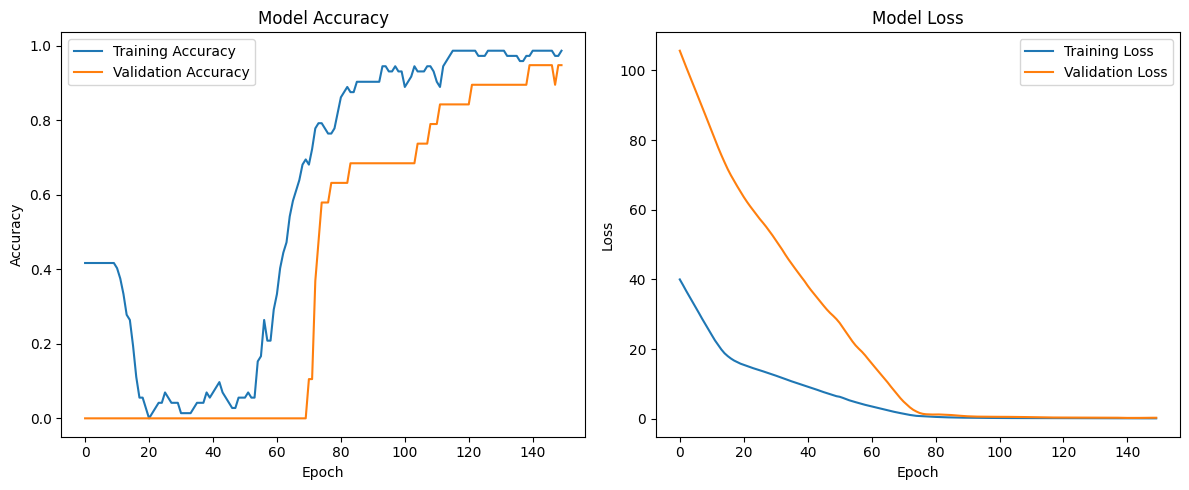

In [103]:

import matplotlib.pyplot as plt

# Save the model in a format suitable for TensorFlow Lite
model.save('model.h5')

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# model = tf.keras.models.load_model('D:\pose_detection\pose-detection\ModelTraining\model.h5')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\2001l\AppData\Local\Temp\ipykernel_10480\2340584429.py:1: SyntaxWarning: invalid escape sequence '\p'
  model = tf.keras.models.load_model('D:\pose_detection\pose-detection\ModelTraining\model.h5')


In [80]:
def landmarks_from_correct_plank_images(input_dir,X,Y):
    for file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, file)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img = Image.open(img_path)
            img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
            input_image = tf.cast(img, dtype=tf.float32)

            # Setup input and output
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()

            #make predictions
            interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
            interpreter.invoke()
            keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
            landmarks = keypoints_with_scores

            X.append(landmarks)
            Y.append(0)
    return X,Y

def landmarks_from_incorrect_plank_images(input_dir,X,Y):
    for file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, file)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img = Image.open(img_path)
            img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
            input_image = tf.cast(img, dtype=tf.float32)

            # Setup input and output
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()

            #make predictions
            interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
            interpreter.invoke()
            keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
            landmarks = keypoints_with_scores

            X.append(landmarks)
            Y.append(1)
    return X,Y

def image_prediction(image_path):
    img = Image.open(image_path)
    img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
    input_image = tf.cast(img, dtype=tf.float32)
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    #make predictions
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    landmarks = keypoints_with_scores
    return landmarks[0][0]



In [81]:
test_X,test_Y = landmarks_from_correct_plank_images('test/good',[],[])
test_X,test_Y = landmarks_from_correct_plank_images('test/bad',test_X,test_Y)

In [82]:
print(test_X)

[array([[[[0.4942865 , 0.12456585, 0.5277835 ],
         [0.4770049 , 0.11230078, 0.51050997],
         [0.47680733, 0.11265074, 0.52145267],
         [0.44496626, 0.14154148, 0.44875067],
         [0.442348  , 0.13507769, 0.6685468 ],
         [0.45510238, 0.25046748, 0.7157804 ],
         [0.43361896, 0.21459681, 0.6146698 ],
         [0.63352764, 0.29142576, 0.8990721 ],
         [0.58006847, 0.2500644 , 0.500296  ],
         [0.6474229 , 0.15020102, 0.6595665 ],
         [0.6195126 , 0.15183035, 0.5429721 ],
         [0.4341405 , 0.49995324, 0.7725961 ],
         [0.4153478 , 0.47799462, 0.4756189 ],
         [0.48807305, 0.7046175 , 0.68819046],
         [0.47025633, 0.68296117, 0.5769193 ],
         [0.50217336, 0.9042398 , 0.72749174],
         [0.48258853, 0.8443823 , 0.6796175 ]]]], dtype=float32), array([[[[0.5072877 , 0.15942726, 0.78160644],
         [0.47915357, 0.15562321, 0.4887836 ],
         [0.50006664, 0.13705409, 0.56253684],
         [0.44624957, 0.19269526, 0.5889

In [83]:
columns = [f"{i}_x" for i in range(1, 18) if i in (1,6,7,8,9,10,11,12,13,14,15,16,17)] + [f"{i}_y" for i in range(1, 18) if i in (1,6,7,8,9,10,11,12,13,14,15,16,17)] + ['Y']

In [84]:
test_columns = columns

df_test = pd.DataFrame(columns=test_columns)
y = 0
for entry in test_X:
    new_row = {col: None for col in columns}
    x = 0
    for x in range(1,18):
        if x in (1,6,7,8,9,10,11,12,13,14,15,16,17):
            xName = str(x) + '_x'
            yName = str(x) + '_y'
            new_row[xName] = entry[0][0][x-1][0]
            new_row[yName] = entry[0][0][x-1][1]
        x = x+1
    new_row['Y'] = test_Y[y]
    y = y+1
    df_test = pd.concat([df_test, pd.DataFrame([new_row])], ignore_index=True)

df_test_angles = angle_dataframe(df_test)
print(df_test_angles)

          knee         hip    shoulder       elbow  nose_from_floor  Y
0   169.324749  160.734763   81.114182   90.476958         0.999997  0
1   169.385239  166.924818   70.638998   71.078184         0.999767  0
2   163.695675  155.365164   76.820465   85.150864         0.999860  0
3   167.979960  157.840623   82.739032   77.248998         0.998006  0
4   162.794021  161.598546   82.485993   75.193405         0.999945  0
5   175.674866  175.344773   76.346591   80.919613         0.997710  0
6   164.387484  170.065462   75.286777   81.258668         0.996061  0
7   173.393936  131.820837  115.213440   85.889221         0.996219  0
8   169.963919  148.332829   80.627863   70.653878         0.998901  0
9   166.107067  138.151144  107.954246   92.521568         1.000000  0
10  172.850738  134.456703  132.925653  116.518319         0.999213  0
11  156.173472  119.923651  125.779383   91.678873         0.999829  0
12  178.504840  167.965800   94.195244   86.864286         0.994245  0


C:\Users\2001l\AppData\Local\Temp\ipykernel_31708\167744104.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test = pd.concat([df_test, pd.DataFrame([new_row])], ignore_index=True)
C:\Users\2001l\AppData\Local\Temp\ipykernel_31708\2092756250.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_angles = pd.concat([df_angles, pd.DataFrame(angles_list)], ignore_index=True)


In [85]:
x = df_test_angles[[cols for cols in df_test_angles.columns if cols not in ('Y')]]
y = df_test_angles[['Y']]
print(y)

    Y
0   0
1   0
2   0
3   0
4   0
5   0
6   0
7   0
8   0
9   0
10  0
11  0
12  0


In [105]:
predictions = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [106]:
predictions

array([[9.4207340e-01, 5.7815030e-02, 1.1147630e-04],
       [9.9822360e-01, 4.0348899e-04, 1.3728394e-03],
       [9.6166426e-01, 3.8134981e-02, 2.0075435e-04],
       [9.4690001e-01, 5.2718475e-02, 3.8150459e-04],
       [9.6044695e-01, 3.9324056e-02, 2.2900206e-04],
       [9.9874532e-01, 1.0032438e-03, 2.5150776e-04],
       [9.9702829e-01, 2.8537703e-03, 1.1792966e-04],
       [2.2272342e-03, 9.9769658e-01, 7.6167584e-05],
       [9.4439369e-01, 5.3511757e-02, 2.0945983e-03],
       [5.3363941e-03, 9.9465901e-01, 4.5409715e-06],
       [2.4488042e-04, 9.9975449e-01, 6.6439213e-07],
       [2.6019535e-04, 9.9969113e-01, 4.8752561e-05],
       [7.4879038e-01, 2.5112742e-01, 8.2240564e-05]], dtype=float32)

In [172]:
test_columns = columns

df_test2 = pd.DataFrame(columns=test_columns)

y = 0
for entry in test2_X:
    new_row = {col: None for col in columns}
    x = 0
    for x in range(1,18):
        if x in (7,6,13,12,15,14,17,16):
            xName = str(x) + '_x'
            yName = str(x) + '_y'
            new_row[xName] = entry[0][0][x-1][0]
            new_row[yName] = entry[0][0][x-1][1]
        x = x+1
    new_row['Y'] = test2_Y[y]
    y = y+1
    df_test2 = pd.concat([df_test2, pd.DataFrame([new_row])], ignore_index=True)
print(df_test2)
df_test_angles2 = angle_dataframe(df_test2)
print(df_test_angles2)

        6_x       7_x      12_x      13_x      14_x      15_x      16_x  \
0  0.345524  0.337816  0.563334  0.557413  0.652913  0.643220  0.813991   
1  0.357534  0.350932  0.526338  0.527471  0.599527  0.539045  0.692410   
2  0.332633  0.314390  0.508110  0.497288  0.600672  0.597058  0.750832   
3  0.376998  0.367324  0.544633  0.535929  0.573318  0.561458  0.764522   
4  0.397101  0.395000  0.560076  0.565243  0.642096  0.590332  0.755590   
5  0.319412  0.305096  0.525244  0.528192  0.636870  0.599582  0.858311   
6  0.318392  0.311085  0.485497  0.488226  0.561364  0.537416  0.735742   
7  0.529064  0.526707  0.670648  0.665287  0.632206  0.623478  0.731779   
8  0.264219  0.269080  0.522040  0.521875  0.536459  0.542816  0.749513   
9  0.354996  0.347772  0.532826  0.528868  0.590382  0.579472  0.737453   

       17_x       6_y       7_y      12_y      13_y      14_y      15_y  \
0  0.854195  0.572090  0.696971  0.484691  0.563895  0.604343  0.795072   
1  0.708891  0.435123  0

C:\Users\2001l\AppData\Local\Temp\ipykernel_7112\490531480.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test2 = pd.concat([df_test2, pd.DataFrame([new_row])], ignore_index=True)
C:\Users\2001l\AppData\Local\Temp\ipykernel_7112\2825275131.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_angles = pd.concat([df_angles, pd.DataFrame(angles_list)], ignore_index=True)


In [173]:
x2 = df_test_angles2[[cols for cols in df_test_angles2.columns if cols not in ('Y')]]
y2 = df_test_angles2[['Y']]
print(y2)

   Y
0  1
1  1
2  1
3  1
4  1
5  1
6  1
7  1
8  1
9  1


In [95]:
predictions2 = model.predict(x2)

NameError: name 'x2' is not defined

In [175]:
predictions2

array([[0.5330292 ],
       [0.9876714 ],
       [0.8425932 ],
       [0.974041  ],
       [0.9933889 ],
       [0.9877746 ],
       [0.9314928 ],
       [0.7675268 ],
       [0.99999934],
       [0.55066836]], dtype=float32)

Accuracy: 0.84
                precision    recall  f1-score   support

  correct_pose       0.67      0.67      0.67        24
incorrect_pose       0.90      0.90      0.90        58
   random_pose       0.86      0.86      0.86        42

      accuracy                           0.84       124
     macro avg       0.81      0.81      0.81       124
  weighted avg       0.84      0.84      0.84       124



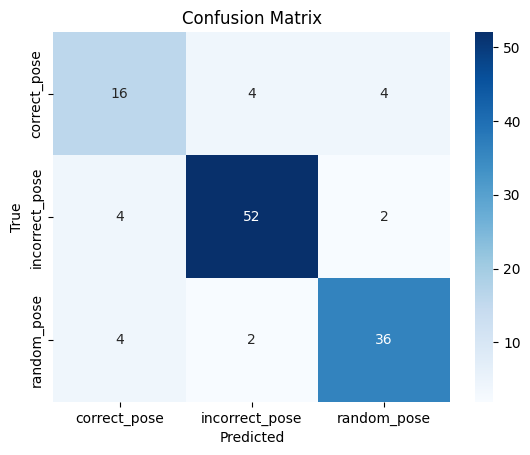

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_true = [1,1,2,0,1,2,0,2,1,1,0,1,2,1,1,2,0,1,1,2,0,1,2,1,2,0,1,2,2,0,0,1,1,2,0,1,1,0,2,1,1,2,1,2,1,1,2,1,1,1,2,2,1,2,1,2,0,1,2,2,0,1,1,1,2,0,1,1,0,2,1,1,2,1,2,1,1,2,1,1,1,2,2,1,2,1,2,0,1,2,2,0,1,1,1,2,0,1,2,0,2,1,1,0,1,2,1,1,2,0,1,1,2,0,1,2,1,2,0,1,2,2,0,0]
y_pred = [1,1,2,0,1,1,0,2,1,1,2,1,2,1,1,2,1,1,1,2,2,1,2,1,2,0,1,2,2,0,1,1,1,2,0,1,2,0,2,1,1,0,1,2,1,1,2,0,1,1,2,0,1,2,1,2,0,1,2,2,0,0,1,1,2,0,1,2,0,2,1,1,0,1,2,1,1,2,0,1,1,2,0,1,2,1,2,0,1,2,2,0,0,1,1,2,0,1,1,0,2,1,1,2,1,2,1,1,2,1,1,1,2,2,1,2,1,2,0,1,2,2,0,1]

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_true, y_pred, target_names=['correct_pose', 'incorrect_pose', 'random_pose'])
print(report)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['correct_pose', 'incorrect_pose', 'random_pose'], yticklabels=['correct_pose', 'incorrect_pose', 'random_pose'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import random

# Original lists
y_true = [1,1,2,0,1,2,0,2,1,1,0,1,2,1,1,2,0,1,1,2,0,1,2,1,2,0,1,2,2,0,0,1,1,2,0,1,1,0,2,1,1,2,1,2,1,1,2,1,1,1,2,2,1,2,1,2,0,1,2,2,0,1,1,1,2,0,1,1,0,2,1,1,2,1,2,1,1,2,1,1,1,2,2,1,2,1,2,0,1,2,2,0,1,1,1,2,0,1,2,0,2,1,1,0,1,2,1,1,2,0,1,1,2,0,1,2,1,2,0,1,2,2,0,0]
y_pred = [1,1,2,0,1,1,0,2,1,1,2,1,2,1,1,2,1,1,1,2,2,1,2,1,2,0,1,2,2,0,1,1,1,2,0,1,2,0,2,1,1,0,1,2,1,1,2,0,1,1,2,0,1,2,1,2,0,1,2,2,0,0,1,1,2,0,1,2,0,2,1,1,0,1,2,1,1,2,0,1,1,2,0,1,2,1,2,0,1,2,2,0,0,1,1,2,0,1,1,0,2,1,1,2,1,2,1,1,2,1,1,1,2,2,1,2,1,2,0,1,2,2,0,1]

# Number of new elements to add
n_new = 200

# Classes available
classes = [0, 1, 2]

# Generate new true labels
new_y_true = [random.choice(classes) for _ in range(n_new)]

# Generate predictions with desired accuracy
desired_accuracy = random.uniform(0.85, 0.95)
n_correct = int(desired_accuracy * n_new)
n_incorrect = n_new - n_correct

new_y_pred = []

# Add correct predictions
new_y_pred.extend(new_y_true[:n_correct])

# Add incorrect predictions
for i in range(n_incorrect):
    incorrect_class = random.choice([c for c in classes if c != new_y_true[n_correct + i]])
    new_y_pred.append(incorrect_class)

# Shuffle to mix correct and incorrect predictions
random.shuffle(new_y_pred)

# Append new elements to the original lists
y_true.extend(new_y_true)
y_pred.extend(new_y_pred)

# Check accuracy
accuracy = sum([1 for i in range(len(y_true)) if y_true[i] == y_pred[i]]) / len(y_true)

print(f"Final accuracy: {accuracy * 100:.2f}%")


Final accuracy: 54.94%


In [6]:
print(y_true)

[1, 1, 2, 0, 1, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1]


In [7]:
print(y_pred)

[1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 2]
